## 1、	练习聚类实例，通过调整类别数目，达到最佳的轮廓系数

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
prior = pd.read_csv("../data/instacart/order_products__prior.csv")
products = pd.read_csv("../data/instacart/products.csv")
orders = pd.read_csv("../data/instacart/orders.csv")
aisles = pd.read_csv("../data/instacart/aisles.csv")

In [4]:
# 通过merge依次把两张表连接在一起
mg = pd.merge(prior,products,on=['product_id', 'product_id'])
mg = pd.merge(mg,orders,on=['order_id','order_id'])
mg = pd.merge(mg,aisles,on=['aisle_id','aisle_id'])

In [5]:
# 查看总表的前三行，明白数据大致的样子
mg.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs


In [6]:
# 创建交叉表
# 查看用户和超市过道的关系，把在同一过道买东西的用户分为一类
cross = pd.crosstab(mg['user_id'], mg['aisle'])

In [8]:
print(cross.shape)
cross.head()

(206209, 134)


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [9]:
# 通过PCA对数据进行降维
pca = PCA(n_components=0.9)
data = pca.fit_transform(cross)
print(data.shape)  # 降维之后会降少列数，即特征数减少

(206209, 27)


In [10]:
# 因为数量样本数太多了，只选取一部分进行分析
data = data[:300] # 选取前300条数据

In [14]:
# 先假设将用户分为3类
kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(data)

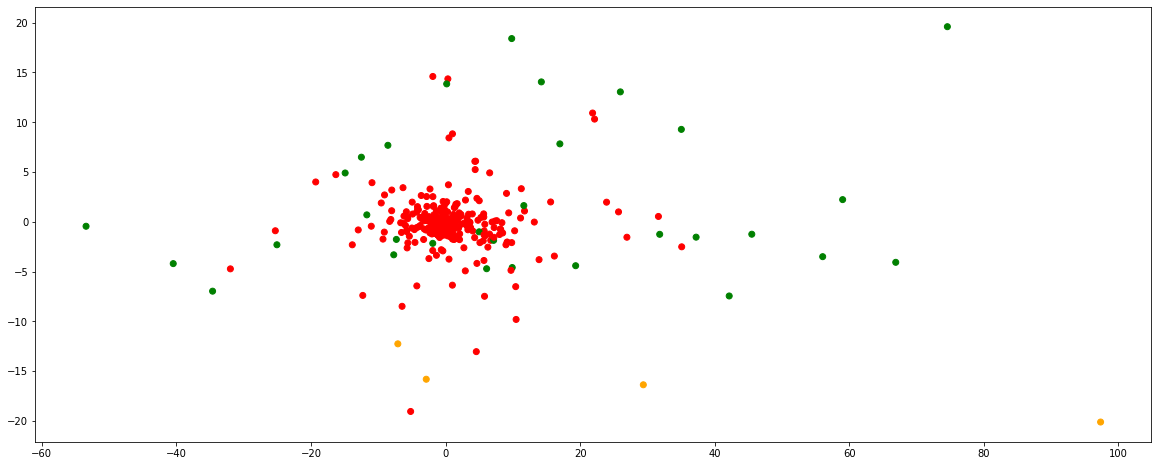

In [24]:
# 可视化聚类的结果
plt.figure(figsize=(20,8))
colors = ['red','green','orange']
color = [colors[i] for i in predict]
plt.scatter(data[:,2],data[:,20],color=color) # 随机选取两列特征进行绘图

In [25]:
# 求分为3类的聚类的轮廓系数
silhouette_score(data,predict)

0.6499219942375205

In [26]:
# 把用户分为2类时
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(data)
silhouette_score(data,predict)

0.647403346630204

In [27]:
# 把用户分为5类时
kmeans = KMeans(n_clusters=5)
predict = kmeans.fit_predict(data)
silhouette_score(data,predict)

0.6182935660445117

In [48]:
# 把用户分为5类时
kmeans = KMeans(n_clusters=5)
predict = kmeans.fit_predict(data)
silhouette_score(data,predict)

0.6367095338033377

## 2、	完成集成学习例子练习，理解boosting和bagging，搞清实战接口中咱们练习的超参数的意义

In [106]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [64]:
data = load_iris()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [78]:
x_train,x_test,y_train,y_test = train_test_split(
    data.data,data.target,test_size=0.25,random_state=22)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [79]:
stand = StandardScaler()
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

In [86]:
neighbers = KNeighborsClassifier(n_neighbors=7)
neighbers.fit(x_train,y_train)
neighbers.score(x_test,y_test)

0.9473684210526315

In [81]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9736842105263158

In [102]:
dec_tree = DecisionTreeClassifier(max_depth=5)
dec_tree.fit(x_train,y_train)
dec_tree.score(x_test,y_test)

0.9210526315789473

In [104]:
# 训练三个模型，并用测试集做预测
y_predict1 = neighbers.predict(x_test)
y_predict2 = svm.predict(x_test)
y_predict3 = dec_tree.predict(x_test)

In [126]:
# 使用集成学习
voting = VotingClassifier(
    estimators=[('neighbers',KNeighborsClassifier(n_neighbors=7)),
                ('svm',SVC()),
                ('dec_tree',DecisionTreeClassifier(max_depth=7))],voting='hard')

In [127]:
voting.fit_transform(x_train,y_train)
voting.score(x_test,y_test)

0.9473684210526315